In [1]:
import matplotlib.pyplot as plt

In [2]:
base_lr = 0.1
gamma = 0.1

# 1) Step LR Scheduler

In [3]:
def step_lr(current_epoch, N, gamma, current_lr):
  lr = current_lr
  if current_epoch % N == 0 and current_epoch > 0:
    lr = lr * gamma
  return lr

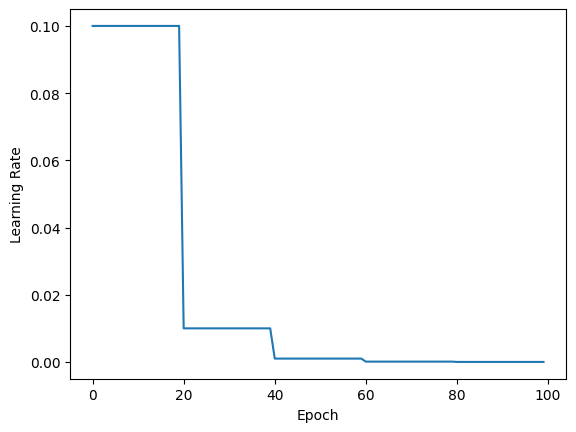

In [4]:
lr_val = []
epoch_num = []
lr_val.append(base_lr)
epoch_num.append(0)

for i in range(1, 100):
  current_lr = lr_val[i-1]
  curr_lr_val = step_lr(i, 20, gamma, current_lr)
  lr_val.append(curr_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# 2) MultiStep LR Scheduler

In [5]:
def multistep_lr(current_epoch, milestone, gamma, current_lr):
  lr = current_lr
  for m in milestone:
    if current_epoch == m:
      lr = lr * gamma
  return lr

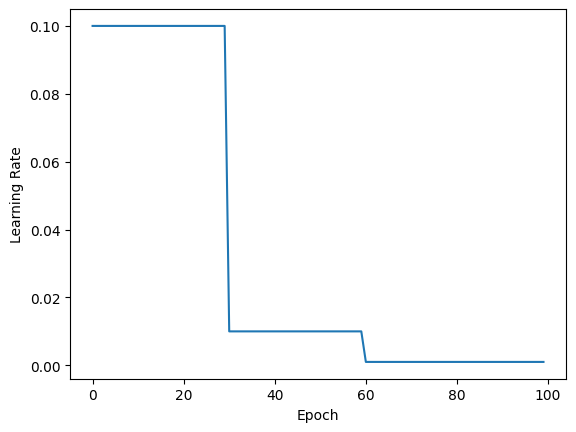

In [6]:
lr_val = []
epoch_num = []
lr_val.append(base_lr)
epoch_num.append(0)
milestone = [30, 60]

for i in range(1, 100):
  current_lr = lr_val[i-1]
  new_lr_val = multistep_lr(i, milestone, gamma, current_lr)
  lr_val.append(new_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# 3) Exponential LR Scheduler

In [7]:
def exp_lr(current_epoch, gamma):
  lr = base_lr * (gamma ** current_epoch)
  return lr

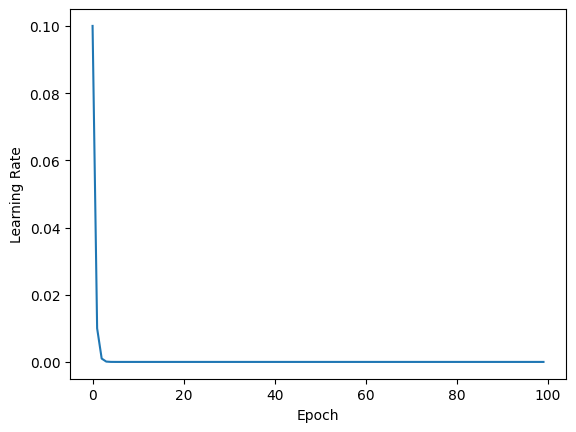

In [8]:
lr_val = []
epoch_num = []

for i in range(100):
  new_lr_val = exp_lr(i, gamma)
  lr_val.append(new_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# 4) Polynomial LR Scheduler

In [9]:
total_epoch = 100

def poly_lr(current_epoch, power):
  lr = base_lr * (1 - current_epoch/ total_epoch) ** power
  return lr

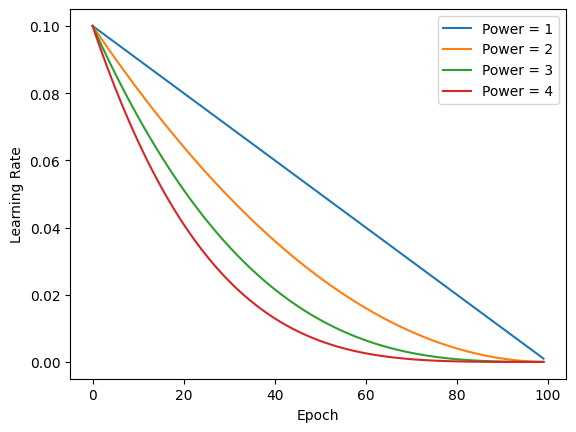

In [10]:
lr_val_p1 = []
epoch_num = []

# Power = 1
for i in range (100):
  new_lr_val = poly_lr(i, 1)
  lr_val_p1.append(new_lr_val)
  epoch_num.append(i)


# Power = 2
lr_val_p2 = []
lr_val_p2.append(base_lr)

for i in range (1, 100):
  new_lr_val = poly_lr(i, 2)
  lr_val_p2.append(new_lr_val)


# Power = 3
lr_val_p3 = []
lr_val_p3.append(base_lr)

for i in range (1, 100):
  new_lr_val = poly_lr(i, 3)
  lr_val_p3.append(new_lr_val)


# Power = 4
lr_val_p4 = []
lr_val_p4.append(base_lr)

for i in range (1, 100):
  new_lr_val = poly_lr(i, 4)
  lr_val_p4.append(new_lr_val)


plt.plot(epoch_num, lr_val_p1, label = 'Power = 1')
plt.plot(epoch_num, lr_val_p2, label = 'Power = 2')
plt.plot(epoch_num, lr_val_p3, label = 'Power = 3')
plt.plot(epoch_num, lr_val_p4, label = 'Power = 4')

plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

# 5) Cosine Annealing LR:

In [11]:
import math

def cosine_lr(current_epoch, total_epoch, max_lr):
  lr = 0.5 * max_lr * (1 + math.cos(math.pi * current_epoch/ total_epoch))
  return lr

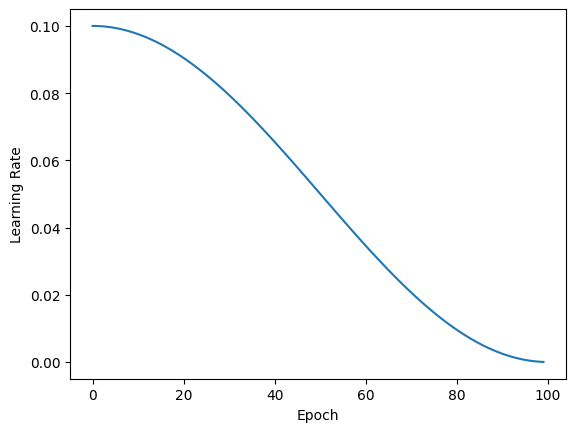

In [12]:
lr_val = []
epoch_num = []
max_lr = base_lr

for i in range(100):
  new_lr_val = cosine_lr(i, 100, max_lr)
  lr_val.append(new_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# 6) Cosine Annealing Warm Restart

In [13]:
def cos_lr_warm_restart(current_epoch, max_lr, T0):                        # T0 = length of current cycle
  cycle_epoch = current_epoch % T0
  lr = 0.5 * max_lr * (1 + math.cos(math.pi * cycle_epoch / T0))
  return lr

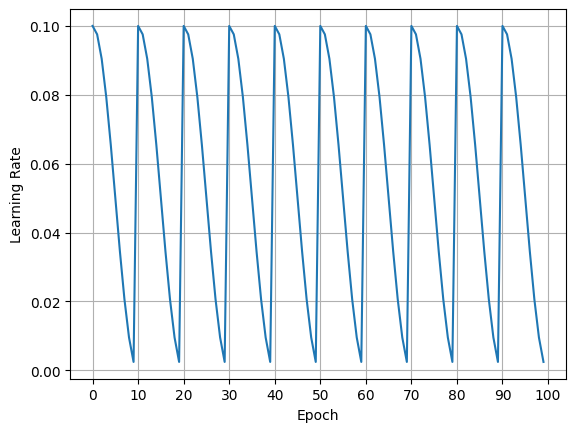

In [14]:
lr_val = []
epoch_num = []
max_lr = base_lr

for i in range(100):
  new_lr_val = cos_lr_warm_restart(i, max_lr, 10)
  lr_val.append(new_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.show()

# 7) Cyclic LR

In [15]:
def cyclic_lr(min_lr, max_lr, current_epoch, cycle_len):
  current_pos = current_epoch % cycle_len
  half_cycle = cycle_len // 2

  if current_pos < half_cycle:
    lr = min_lr + (max_lr - min_lr) * (current_pos / half_cycle)

  else:
    lr = max_lr - (max_lr - min_lr) * ((current_pos - half_cycle) / half_cycle)

  return lr

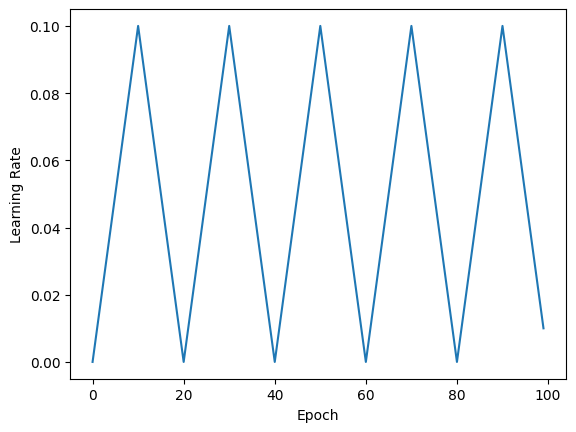

In [16]:
lr_val = []
epoch_num = []
max_lr = base_lr

for i in range(100):
  new_lr_val = cyclic_lr(0, max_lr, i, 20)
  lr_val.append(new_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# 8) OneCyclic LR

In [17]:
def one_Cyclic_lr(min_lr, max_lr, current_epoch, total_epoch):
  current_pos = current_epoch % total_epoch
  half_cycle = total_epoch // 2

  if current_pos < half_cycle:
    lr = min_lr + (max_lr - min_lr) * (current_pos / half_cycle)

  else:
    lr = max_lr - (max_lr -min_lr) * ((current_pos - half_cycle) / half_cycle)

  return lr

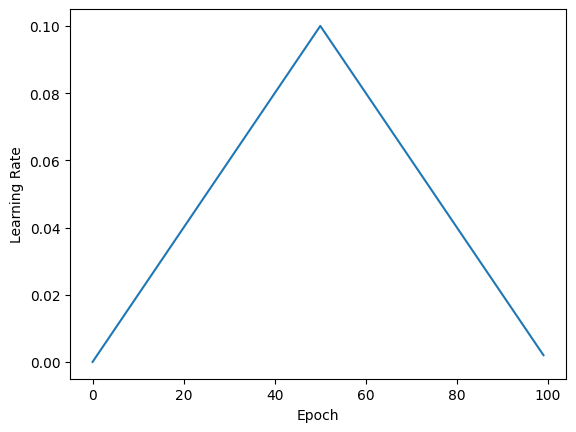

In [18]:
lr_val = []
epoch_num = []
max_lr = base_lr

for i in range(100):
  new_lr_val = one_Cyclic_lr(0, max_lr, i, 100)
  lr_val.append(new_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# 9) Warm-up + Decay (Transformer Standard)

In [19]:
def warm_decay(max_lr, current_epoch, t_warm, total_epoch):

  if current_epoch < t_warm:
    lr = max_lr * current_epoch / t_warm
  else:                                                      # Cosine dacay
    lr = 0.5 * max_lr * (1 + math.cos(math.pi * (current_epoch - t_warm) / (total_epoch - t_warm)))

  return lr

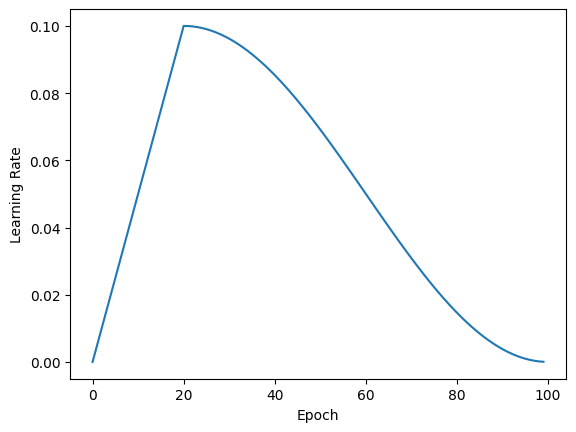

In [20]:
lr_val = []
epoch_num = []
max_lr = base_lr

for i in range(100):
  new_lr_val = warm_decay(max_lr, i, 20, 100)
  lr_val.append(new_lr_val)
  epoch_num.append(i)

plt.plot(epoch_num, lr_val)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()